# BUSSINESS CASE : -  TO PREDICT THE PRICE RANGE OF THE PHONE AND NOT THE ACTUAL PRICE

# About the dataset : - 

        - It has specifications of the phones
        - It shows the price range of the mobiles as 0(low price),1(normal price),2(high price)

In [1]:
#Import liabrary

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# DOMAIN ANALYSIS

           1) Battery_power - Total energy a battery can store in mah
           2) blue - whether it has bluetooth or not
           3) clock_speed - speed of the microprocessor
           4) dual_sim - Supports dual sim or not
           5) fc - front camera mega pixels
           6) four_g - Has 4G or not
           7) int_memory - Internal memory in Gigabytes
           8) m_dep - mobile depth in cm
           9) mobile_wt - mobile weight 
          10) n_cores - no of cores of processor
          11) pc - Primary Camera mega pixels
          12) px_height - Pixel Resolution Height
          13) px_width - Pixel Resolution width
          14) ram - Random Access memory in Megabytes
          15) sc_h - Screen Height
          16) sc_w - Screen Weight
          17) talk_time - time that full battery charge is come to 0
          18) three_g - Supports 3G or not
          19) touch_screen - Has touch screen or not
          20) wifi - supports wifi or not
          21) price_range - This is target variable with value of 0(low                     cost),1(Medium Cost),2(high cost),3(Very high cost)

# Data Collection

In [3]:
data=pd.read_csv("datasets_11167_15520_train.csv")
pd.set_option("display.max_rows",None)

# Rename Columns

In [4]:
#change columns name for our comfort
data=data.rename(columns={"battery_power":"Battery_power","blue":"Bluetooth","clock_speed":"Clock_speed","dual_sim": "Dual_sim","fc":"Front_camera","four_g":"4G","int_memory":"Internal_memory","m_dep":"Mobile_depth","mobile_wt":"Mobile_weight","n_cores":"Number_of_cores","pc":"Primary_camera_pixels","px_height":"Pixel_height","px_width":"Pixel_width","ram":"Ram","sc_h":"Screen_height","sc_w":"Screen_Weight","talk_time":"Talk_time","three_g":"3G","touch_screen":"Touch_screen","wifi":"Wifi","price_range":"Price_range"});

# BASIC CHECKS

In [5]:
a=data.copy()

In [6]:
data.head(5)

,Battery_power,Bluetooth,Clock_speed,Dual_sim,Front_camera,4G,Internal_memory,Mobile_depth,Mobile_weight,Number_of_cores,...,Pixel_height,Pixel_width,Ram,Screen_height,Screen_Weight,Talk_time,3G,Touch_screen,Wifi,Price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
data.tail(5)

,Battery_power,Bluetooth,Clock_speed,Dual_sim,Front_camera,4G,Internal_memory,Mobile_depth,Mobile_weight,Number_of_cores,...,Pixel_height,Pixel_width,Ram,Screen_height,Screen_Weight,Talk_time,3G,Touch_screen,Wifi,Price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
Bluetooth,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
Clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
Dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
Front_camera,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
4G,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
Internal_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
Mobile_depth,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
Mobile_weight,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
Number_of_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
data.shape

(2000, 21)

In [10]:
data.columns

Index(['Battery_power', 'Bluetooth', 'Clock_speed', 'Dual_sim', 'Front_camera',
       '4G', 'Internal_memory', 'Mobile_depth', 'Mobile_weight',
       'Number_of_cores', 'Primary_camera_pixels', 'Pixel_height',
       'Pixel_width', 'Ram', 'Screen_height', 'Screen_Weight', 'Talk_time',
       '3G', 'Touch_screen', 'Wifi', 'Price_range'],
      dtype='object')

In [11]:
pd.set_option("display.max_rows",2000)
pd.set_option("display.max_columns",21)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Battery_power          2000 non-null   int64  
 1   Bluetooth              2000 non-null   int64  
 2   Clock_speed            2000 non-null   float64
 3   Dual_sim               2000 non-null   int64  
 4   Front_camera           2000 non-null   int64  
 5   4G                     2000 non-null   int64  
 6   Internal_memory        2000 non-null   int64  
 7   Mobile_depth           2000 non-null   float64
 8   Mobile_weight          2000 non-null   int64  
 9   Number_of_cores        2000 non-null   int64  
 10  Primary_camera_pixels  2000 non-null   int64  
 11  Pixel_height           2000 non-null   int64  
 12  Pixel_width            2000 non-null   int64  
 13  Ram                    2000 non-null   int64  
 14  Screen_height          2000 non-null   int64  
 15  Scre

In [13]:
data.isnull().sum() #No missing values

Battery_power            0
Bluetooth                0
Clock_speed              0
Dual_sim                 0
Front_camera             0
4G                       0
Internal_memory          0
Mobile_depth             0
Mobile_weight            0
Number_of_cores          0
Primary_camera_pixels    0
Pixel_height             0
Pixel_width              0
Ram                      0
Screen_height            0
Screen_Weight            0
Talk_time                0
3G                       0
Touch_screen             0
Wifi                     0
Price_range              0
dtype: int64

In [14]:
data.nunique().sort_values(ascending=False)

Ram                      1562
Pixel_height             1137
Pixel_width              1109
Battery_power            1094
Mobile_weight             121
Internal_memory            63
Clock_speed                26
Primary_camera_pixels      21
Front_camera               20
Screen_Weight              19
Talk_time                  19
Screen_height              15
Mobile_depth               10
Number_of_cores             8
Price_range                 4
Bluetooth                   2
4G                          2
Dual_sim                    2
3G                          2
Touch_screen                2
Wifi                        2
dtype: int64

In [15]:
data["Price_range"].value_counts()

Price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [16]:
data.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

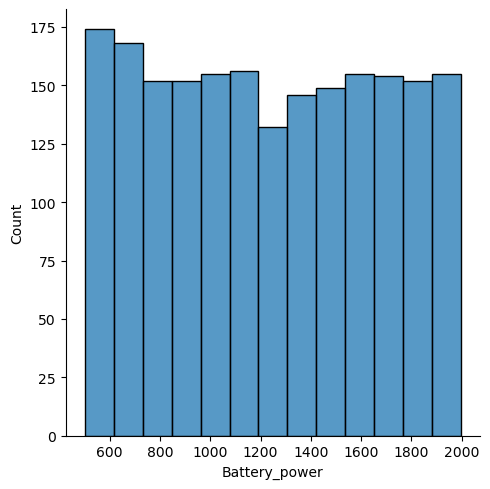

In [17]:
sns.displot(data["Battery_power"])
plt.show()

# Insight

     1) The range of battery_power are 600 to 2000
     2) The range of 600 are mostly avaliable compared to others
     3) The range of 1200 are least batteries

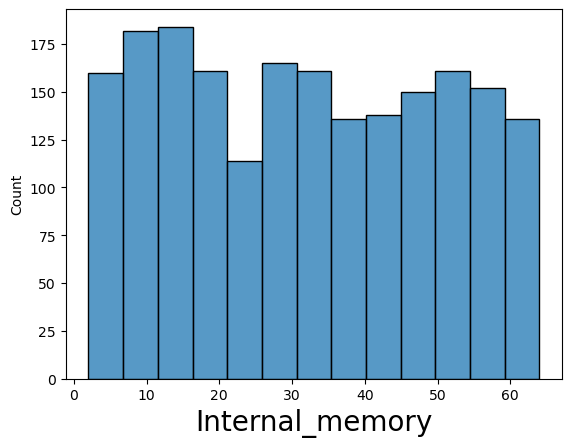

In [18]:
sns.histplot(x="Internal_memory",data=data)
plt.xlabel("Internal_memory",fontsize=20)
plt.show()

# INSIGHT
         
         - The number of devices is high on 10 GB to 15 GB internal_memory
         - Only few devices have 25 GB Internal_memory

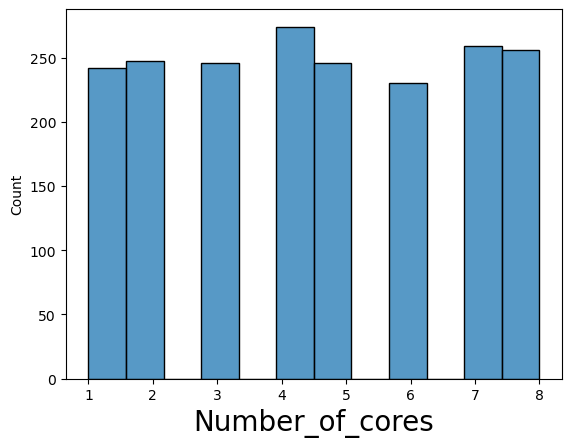

In [19]:
sns.histplot(x="Number_of_cores",data=data)
plt.xlabel("Number_of_cores",fontsize=20)
plt.show()

# Insights
         
          - Devices with 4 to 5 number_of_cores is the highest of all 
          - The lowest number of devices is found out with 6 no_of_cores

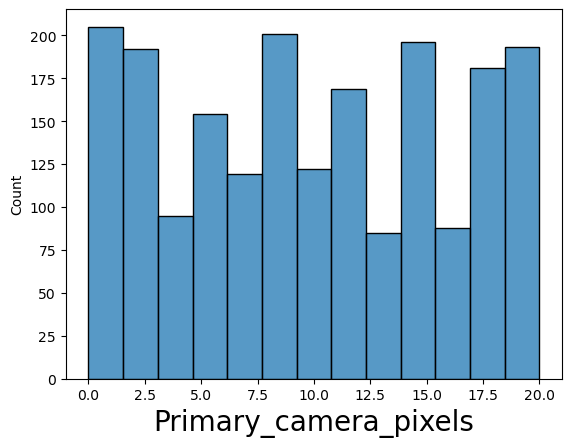

In [20]:
sns.histplot(x="Primary_camera_pixels",data=data)
plt.xlabel("Primary_camera_pixels",fontsize=20)
plt.show()

# Insights
   
         - The most of the devices doesn't have primary camera as you can see it's high in 0
         - And the lowest devices are avaliable at 12.5 pixels 

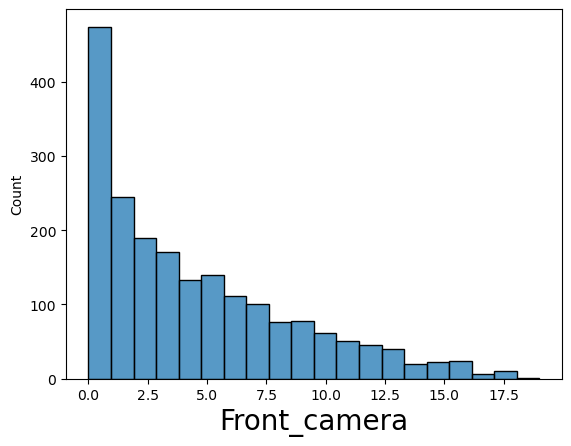

In [21]:
sns.histplot(x="Front_camera",data=data)
plt.xlabel("Front_camera",fontsize=20)
plt.show()

# Insights
        - Like the primary camera we can find that most of the devices doesn't have front camera
        - And the lowest devices have 16.5 pixels 

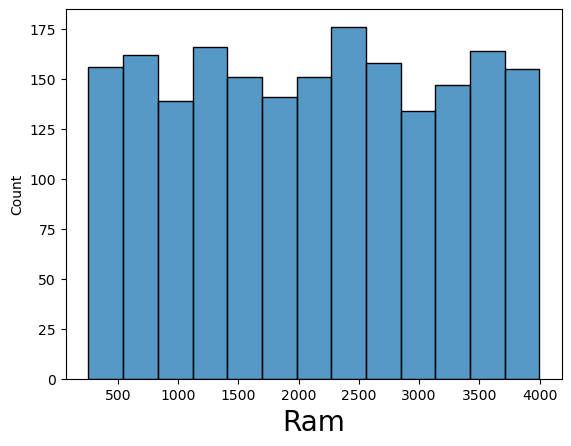

In [22]:
sns.histplot(x="Ram",data=data)
plt.xlabel("Ram",fontsize=20)
plt.show()

# Insights
          
          - We can see that the most of the devices have 2500 Mb RAM which is 2.5 GB
          - 3000 MB ram is found in lowest devices

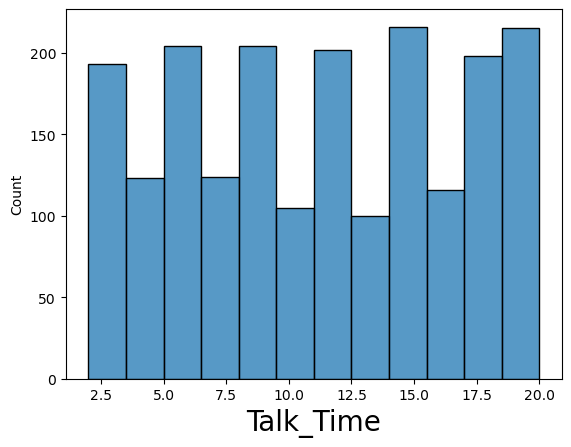

In [23]:
sns.histplot(x="Talk_time",data=data)
plt.xlabel("Talk_Time",fontsize=20)
plt.show()

# Insights

       - The most of the devices have 20 hrs talktime
       - And only few devices have 12.5 hrs talktime

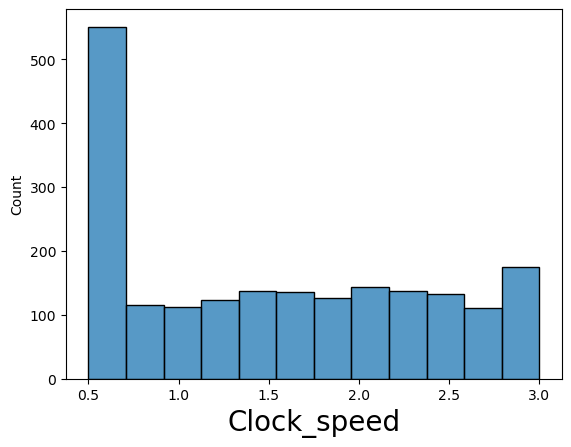

In [24]:
sns.histplot(x="Clock_speed",data=data)
plt.xlabel("Clock_speed",fontsize=20)
plt.show()

# Insights

          - Most of the devices have 0.5 clock_speed
          - the least number of devices have the clock_speed of 1.0 

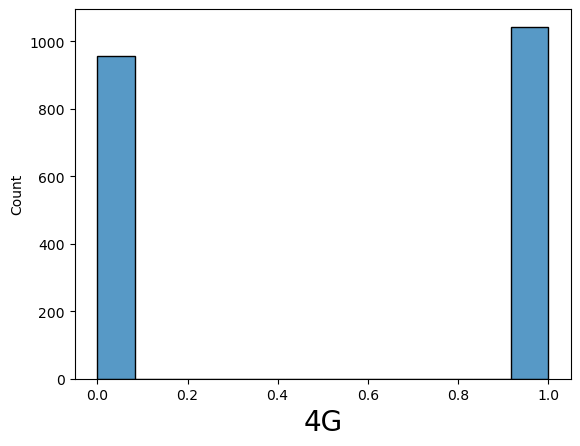

In [25]:
sns.histplot(x="4G",data=data)
plt.xlabel("4G",fontsize=20)
plt.show()

# Insights
          
          - Most of the devices have 4g compared to non 4G devices


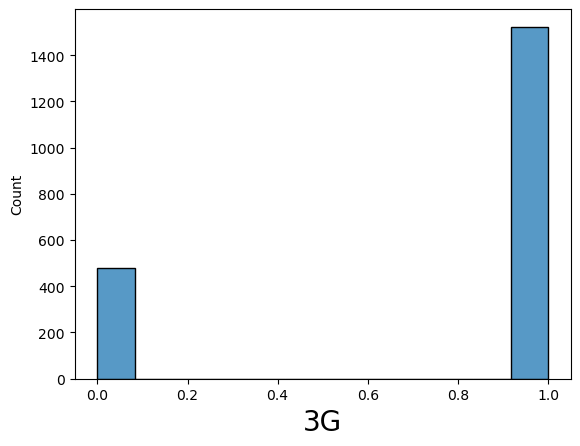

In [26]:
sns.histplot(x="3G",data=data)
plt.xlabel("3G",fontsize=20)
plt.show()

# Insights
          1) The most devices have 3G in it
          
          2) Very least devices doesn't have 3G
         
          3) There is high Correlation between the primary camera and selfie camera
          4) 4G and 3G also have good correlation

# Barplot

In [27]:
sns.set_style('whitegrid') #Identify numeric features correalted with price_range
corr_fea = data.corr()['Price_range'].sort_values(ascending=False)

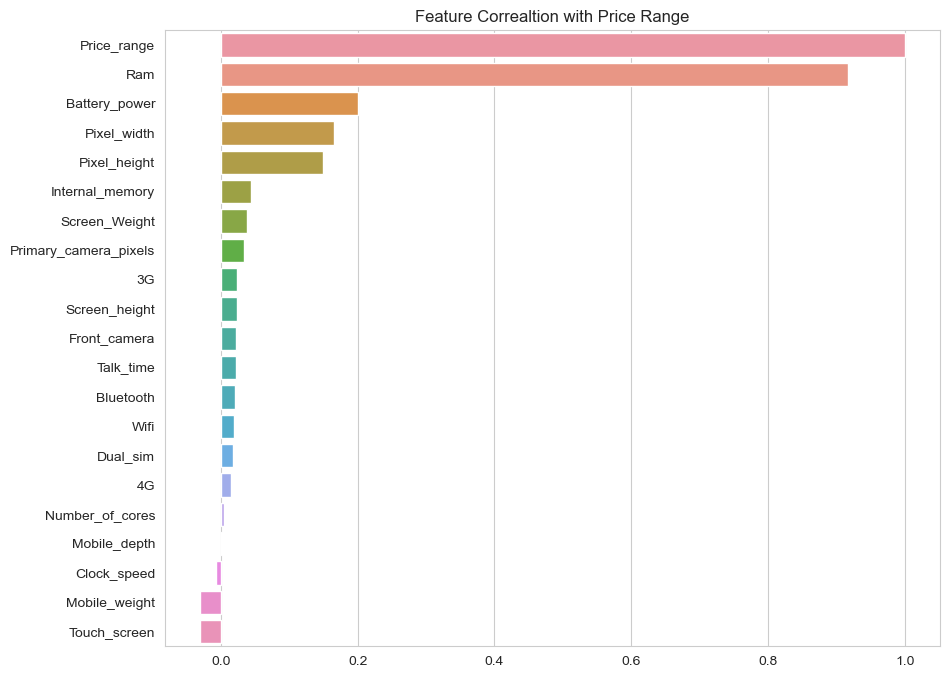

In [172]:
#bar plot to find correlation
#bivariate
plt.figure(figsize=(10,8))
sns.barplot(x=corr_fea.values, y=corr_fea.index)
plt.xticks()
plt.title("Feature Correaltion with Price Range")
plt.show()

# Insight

     1) This is a graphical representation of how feature is correalted with price range
     2) Price range,RAM,Battery power,Pixel width and Pixel height these were the top 5 correlated things
     3) We can see Mobile depth is very low correlated with the price range

# Pairplot

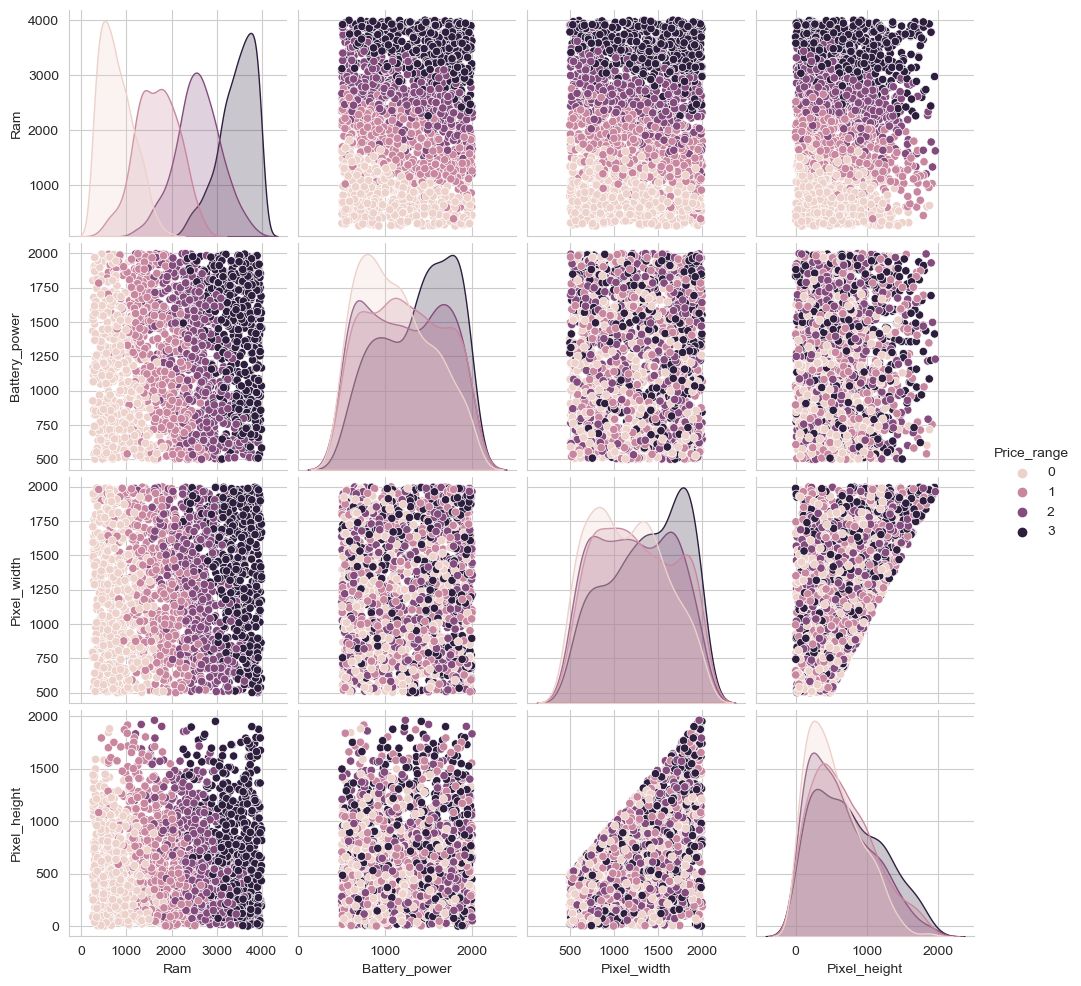

In [29]:
# Multivariate Analysis
# Pairplot fro the most correalated features with 'Price_range'
most_corr_fea=corr_fea.index[1:5]
sns.pairplot(data,vars=most_corr_fea,hue="Price_range")
plt.show()

# Data Pre-Processing
        
        1) Process of cleaning and preparing the raw data to enable feature engineering
        2) Handling missing values
        3) Handling outliers
        4) Drop Duplicates
        5) handling categorical variables
        6) scaling

In [30]:
#sum of missing data
data.isnull().sum().sort_values(ascending=False)

Battery_power            0
Pixel_height             0
Wifi                     0
Touch_screen             0
3G                       0
Talk_time                0
Screen_Weight            0
Screen_height            0
Ram                      0
Pixel_width              0
Primary_camera_pixels    0
Bluetooth                0
Number_of_cores          0
Mobile_weight            0
Mobile_depth             0
Internal_memory          0
4G                       0
Front_camera             0
Dual_sim                 0
Clock_speed              0
Price_range              0
dtype: int64

  - NO MISSING DATA

In [31]:
data.duplicated().sum() #No duplicate values

0

   - No duplicates data

# Check outlier

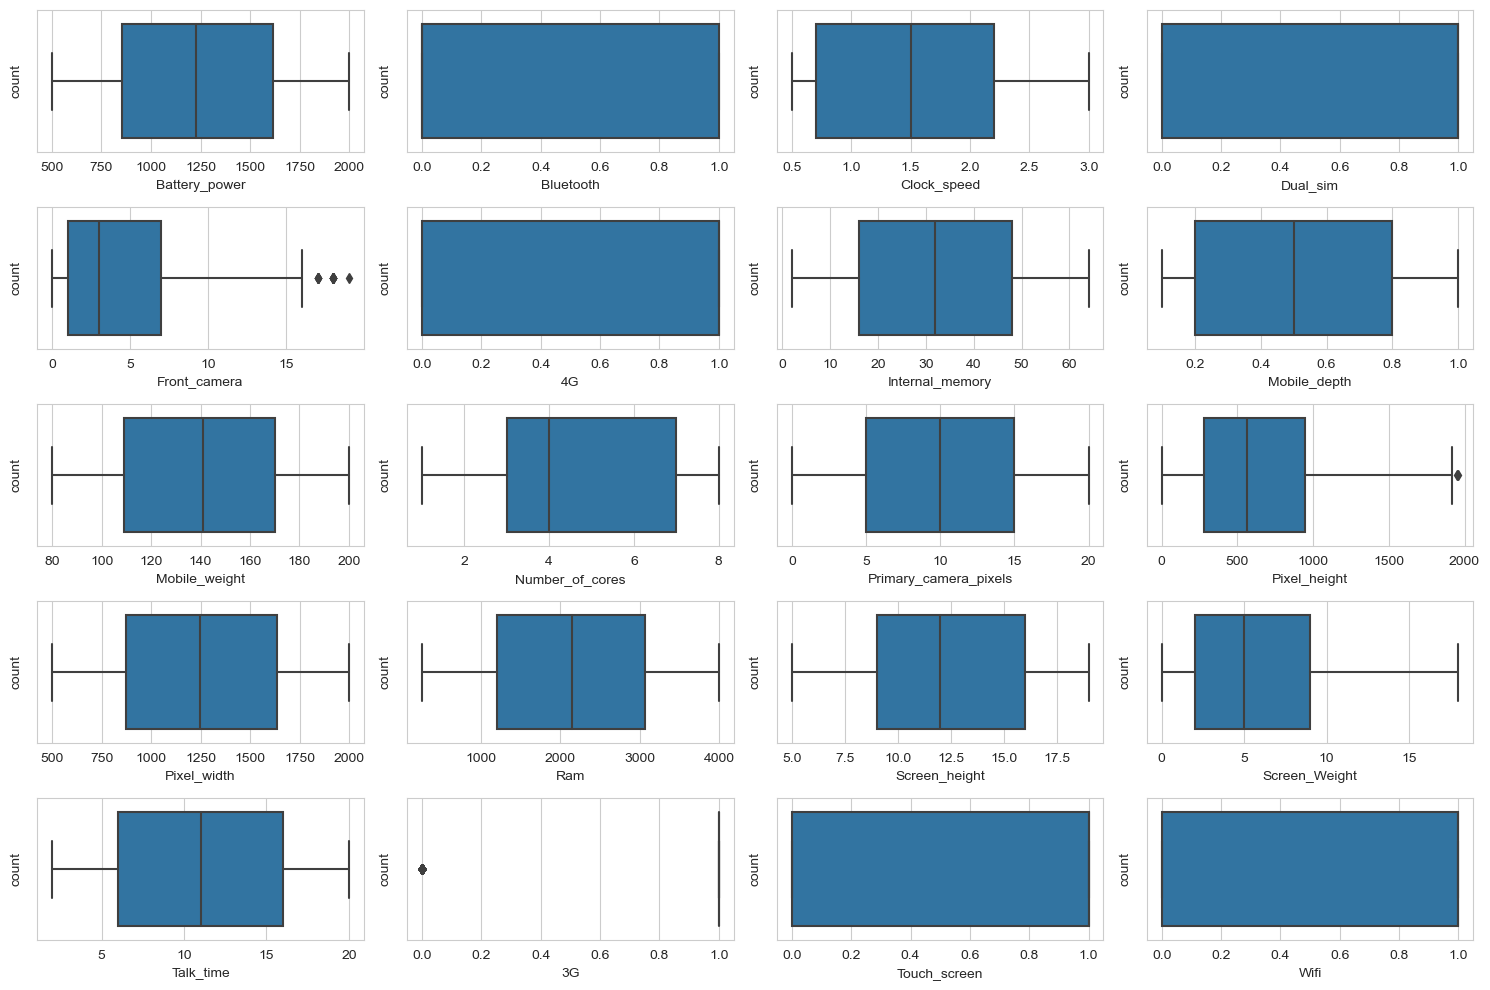

In [37]:
plt.figure(figsize=(15,10),facecolor="White")
plotnumber=1
for column in data.drop("Price_range",axis=1):
    if plotnumber<21:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
        plotnumber+=1
    plt.tight_layout()

# Insight

        - Out of all these features we found that Front_camera and Pixel_height have outliers
        - Otherwise all features are good

# OUTLIER DETECTION AND REMOVAL

  - Removing outliers is important step,while removing outliers we should be careful
  - we are going to drop the outliers

<Axes: xlabel='Front_camera'>

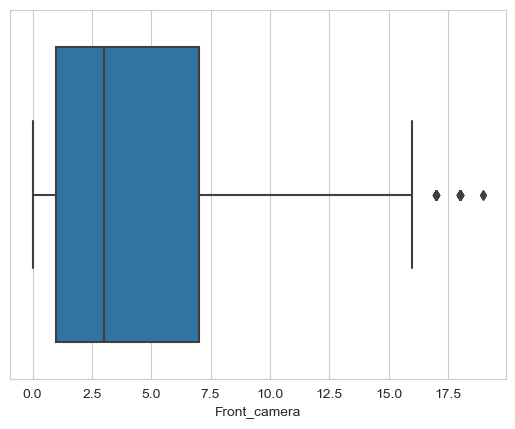

In [40]:
sns.boxplot(x="Front_camera",data=data)

In [41]:
data.drop(data.loc[data["Front_camera"]>15].index,axis=0,inplace=True)

<Axes: xlabel='Front_camera'>

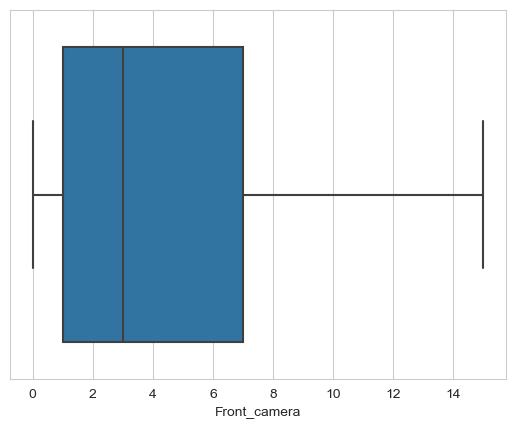

In [42]:
sns.boxplot(x="Front_camera",data=data)

<Axes: xlabel='Pixel_height'>

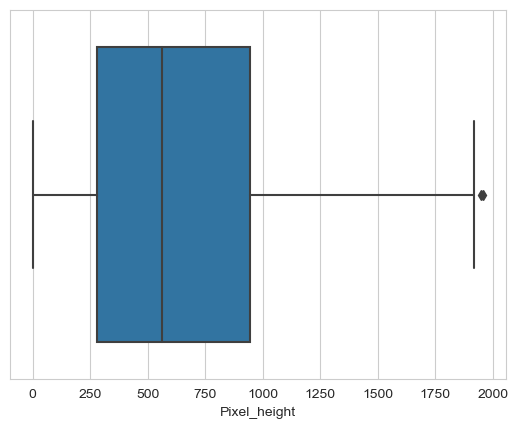

In [43]:
sns.boxplot(x="Pixel_height",data=data)

In [44]:
data.drop(data.loc[data["Pixel_height"]>1800].index,axis=0,inplace=True)

<Axes: xlabel='Pixel_height'>

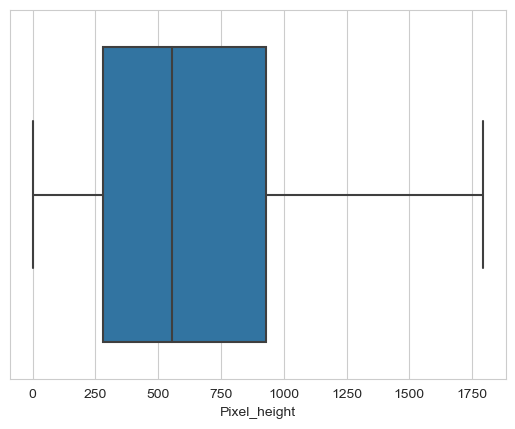

In [45]:
sns.boxplot(x="Pixel_height",data=data)

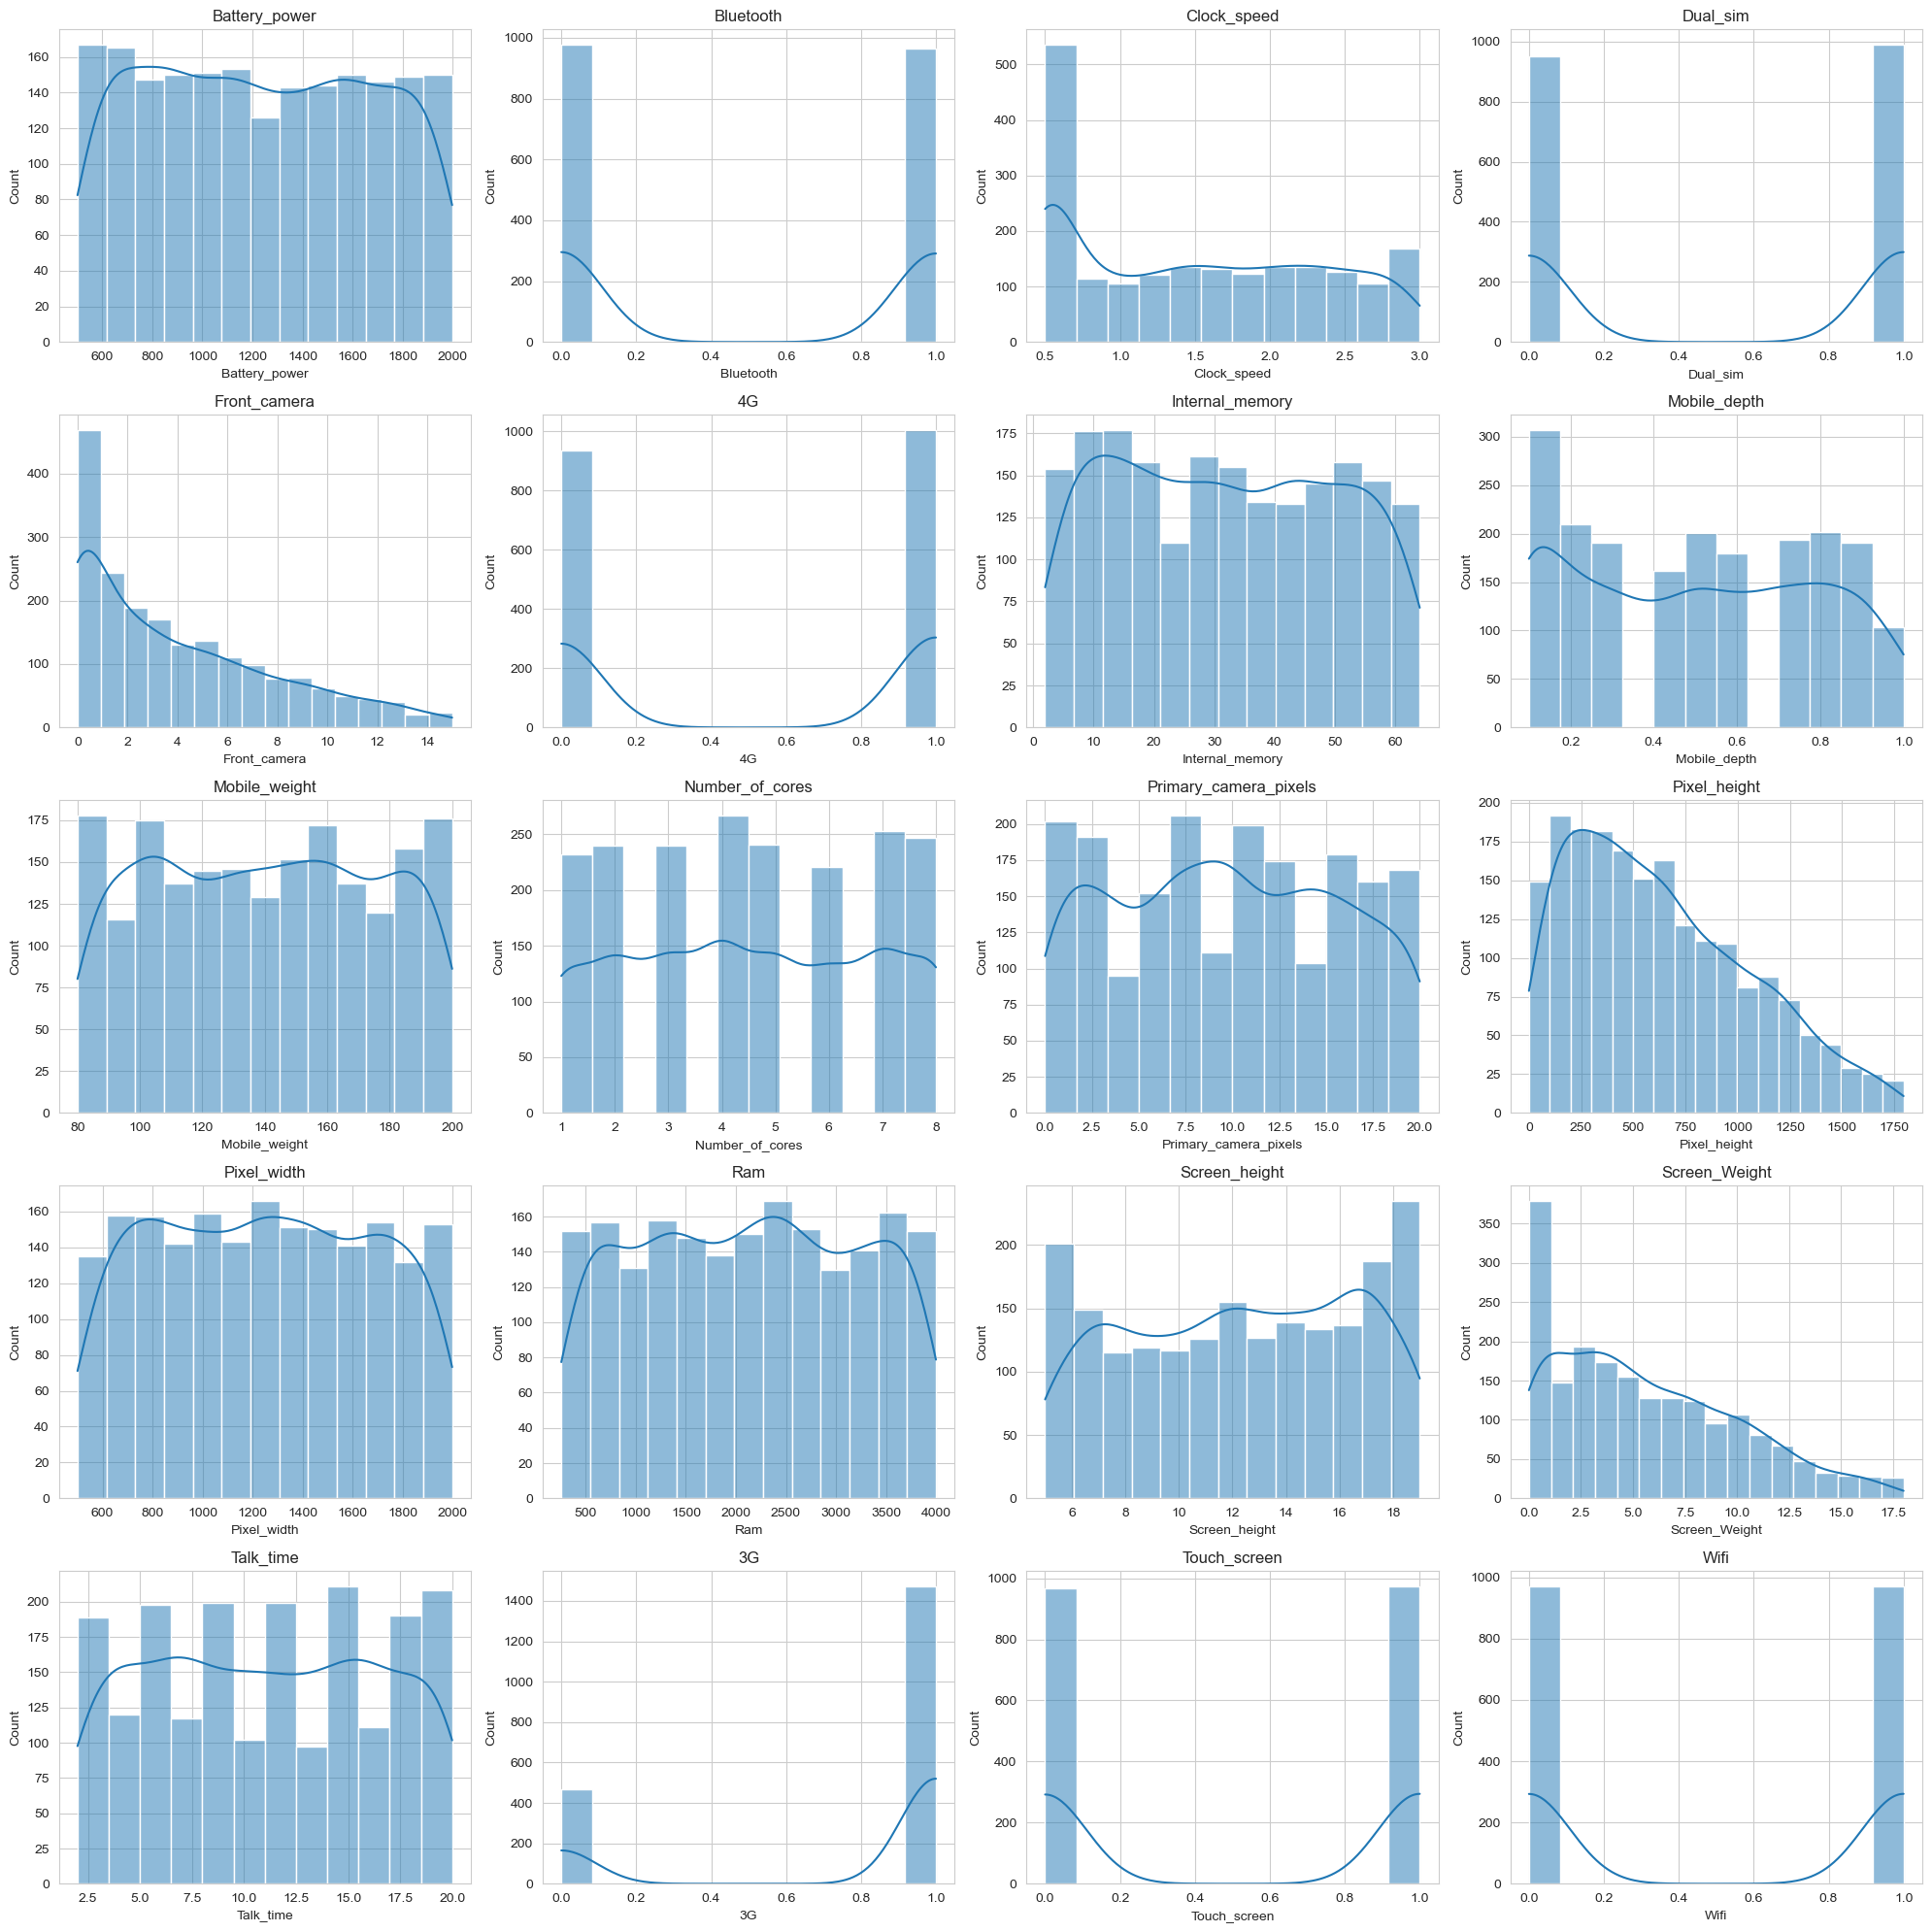

In [50]:
#Univariate Analysis
#Histograms for all numeric features
plt.figure(figsize=(20,20))
for i,column in enumerate(data.drop("Price_range",axis=1).columns,1):
    plt.subplot(5,4,i)
    sns.histplot(data[column],kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Insights
- Battery Power: Shows a fairly uniform distribution, indicating that battery capacity varies widely across the mobile phones.
- Bluetooth: Indicates a nearly balanced presence of Bluetooth capability across the dataset.
- Clock Speed: Suggests that most phones have lower clock speeds, with fewer phones having high clock speeds.
- Dual SIM: Shows that dual SIM functionality is quite common among the phones.
- Front Camera Megapixels: Reveals a right-skewed distribution, meaning most phones have lower front camera megapixels.
- 4G: Highlights that a significant number of phones support 4G.
- Internal Memory: Displays a wide distribution, suggesting varied internal storage options.
- Mobile Depth: Indicates a concentration of phones with slimmer profiles.
- Mobile Weight: Shows a broad distribution, implying a variety of phone weights.
- Number of Cores: Suggests that phones with 2 to 4 cores are most common, with fewer phones having higher core counts.
- Primary Camera Megapixels: Also right-skewed, similar to the front camera, with most phones having lower megapixels.
- Pixel Resolution Height and Width: Shows varied pixel resolutions, with a slight right skew indicating some phones have very high resolutions.
- RAM: Displays a wide range of RAM sizes, with a concentration at the lower end.
- Screen Height and Width: Indicates a variety of screen sizes, with a tendency towards larger screens.
- Talk Time: Shows a broad range of battery life as measured by talk time.
- 3G and 4G: Reflects the availability of 3G and 4G across the dataset, with a large number of phones supporting these technologies.
- Touch Screen: Shows that touch screen functionality is common.
- WiFi: Indicates that WiFi capability is also common among the phones.


*) These distributions help in understanding the range and commonality of features in mobile phones,which can be crucial for market segmentation and targeting specific customer groups.
           

# Feature Selection : PCA

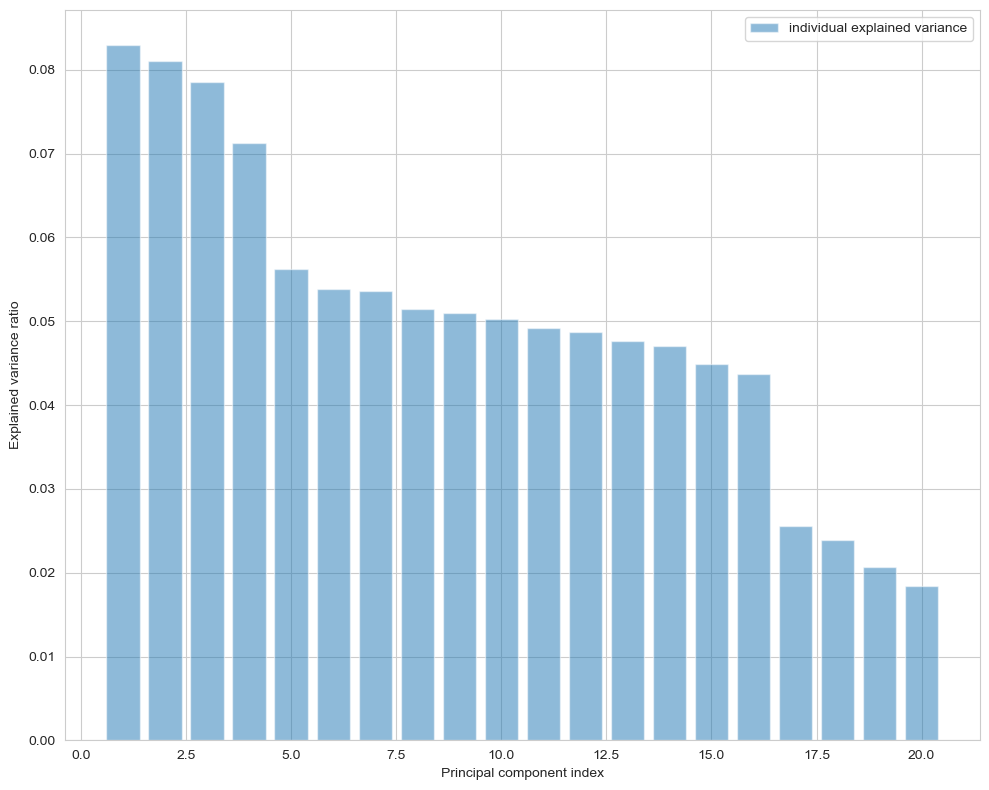

Most important features for prediction according to PCA:
Front_camera
Primary_camera_pixels
Talk_time
Mobile_weight
Mobile_depth
Battery_power
Clock_speed
Bluetooth
Ram
Number_of_cores
Touch_screen
Dual_sim
Wifi
Internal_memory
Pixel_width
Pixel_height
Screen_height
Screen_Weight
3G
4G


In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Price_range', axis=1))
pca = PCA(n_components=20)
pca.fit(X_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Get the most important features according to the first principal component
most_important_features_indices = np.argsort(-pca.components_[0])
most_important_features = [data.drop('Price_range', axis=1).columns[i] for i in most_important_features_indices]
plt.figure(figsize=(10, 8))
plt.bar(range(1, 21), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Print the most important features
print('Most important features for prediction according to PCA:')
for feature in most_important_features:
    print(feature)

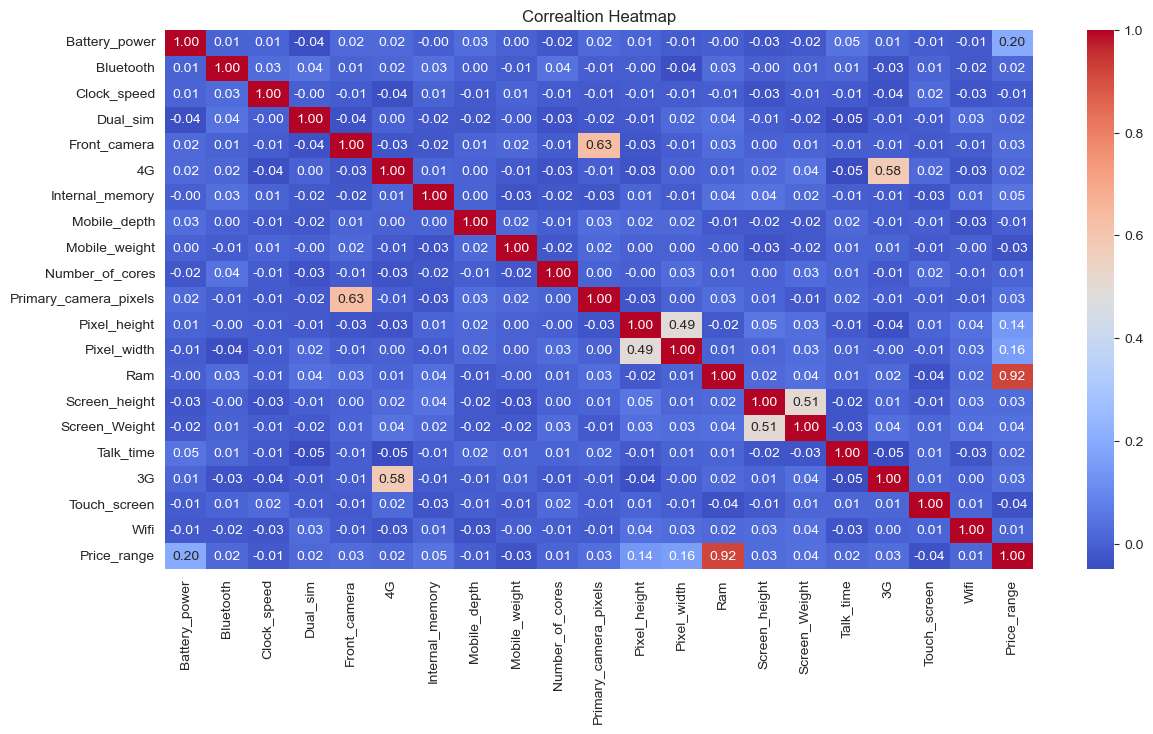

In [52]:
# Correlation heatmap
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Correaltion Heatmap")
plt.show()

# Insights

- The table above lists the features of the mobile phones along with their respective importance percentages as determined by PCA.

- These percentages indicate how much of the variance in the dataset each feature explains, which is a proxy for their importance in predicting the price range.

- The feature battery_power is the most important explaining approximately 8.39% of the variance followed by (Bluetooth) at about 8.06%, and clock_speed at roughly 7.88%.

- The least important feature is wifi explaining about 1.78% of the variance
      

# MODEL PREDICTION
      
     - It is the process of using a trained predictive model to evaluate the output for new unseen input variable model which is useful for making decisions,evaluating scenarios and future events

In [55]:
x=data.drop("Price_range",axis=1)
y=data.Price_range

# SPLIT DATA

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

# LOGISTIC REGRESSION

In [57]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [58]:
testdata=model.predict(x_test)
x_train_pred=model.predict(x_train)

# EVALUATE THE MODELS

In [60]:
print("Test Accuracy:",accuracy_score(y_test,testdata))
print("Training Accuracy :",accuracy_score(y_train,x_train_pred))

Test Accuracy: 0.6555269922879178
Training Accuracy : 0.6288659793814433


LogisticRegression Accuracy Score: 0.6555269922879178
              precision    recall  f1-score   support

           0       0.86      0.70      0.78       108
           1       0.53      0.61      0.57        95
           2       0.53      0.51      0.52        90
           3       0.72      0.78      0.75        96

    accuracy                           0.66       389
   macro avg       0.66      0.65      0.65       389
weighted avg       0.67      0.66      0.66       389



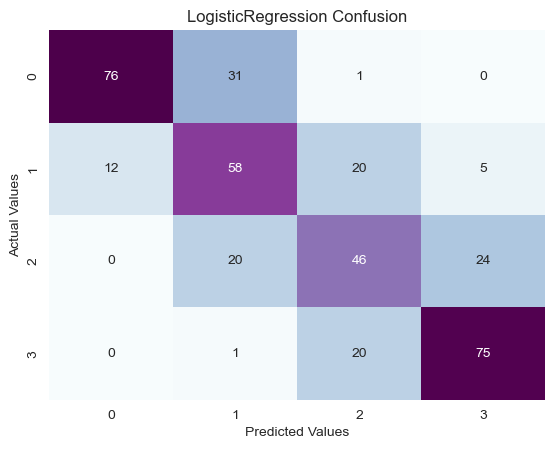

In [62]:
def my_confusion_matrix(y_test,testdata, plt_title):
    cm=confusion_matrix(y_test,testdata)
    print(classification_report(y_test,testdata))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print("LogisticRegression Accuracy Score:",accuracy_score(y_test,testdata))
cm_rfc=my_confusion_matrix(y_test,testdata,"LogisticRegression Confusion")


 - This model works well but we did'nt get the good accuracy so we can go with some other models

# DECISION TREE CLASSIFIER

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=1,min_samples_split=30,splitter="random")
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=30,
                       splitter='random')

In [67]:
DT=dt.predict(x_test)
x_train_predDT=dt.predict(x_train)

- MODEL EVALUATION

In [66]:
print("Test Accuracy:",accuracy_score(y_test,DT))
print("Train Accuracy:",accuracy_score(y_train,x_train_predDT))

Test Accuracy: 0.8611825192802056
Train Accuracy: 0.8814432989690721


 DecisionTree Classifier Accuracy Score:  0.8611825192802056
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       108
           1       0.82      0.84      0.83        95
           2       0.78      0.81      0.79        90
           3       0.91      0.86      0.89        96

    accuracy                           0.86       389
   macro avg       0.86      0.86      0.86       389
weighted avg       0.86      0.86      0.86       389



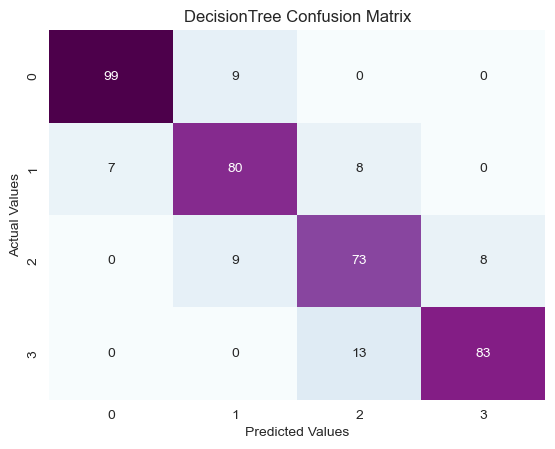

In [70]:
def my_confusion_matrix(y_test, DT, plt_title):
    cm=confusion_matrix(y_test, DT)
    print(classification_report(y_test,DT))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' DecisionTree Classifier Accuracy Score: ',accuracy_score(y_test,DT))
cm_rfc=my_confusion_matrix(y_test, DT, 'DecisionTree Confusion Matrix')

- We got some good accuracy but looking at the model we can see that we can get better accuracy at other models

# SVM CLASSIFIER

In [72]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(x_train,y_train)

SVC(decision_function_shape='ovo')

In [73]:
y_pred_svm=svm_clf.predict(x_test)
x_train_preSVM=svm_clf.predict(x_train)

In [74]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_svm))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preSVM))#Traning Accuracy

Test Accuracy :  0.9588688946015425
Traning Accuracy :  0.9536082474226805


 SVM Classifier Accuracy Score:  0.9588688946015425
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.92      0.97      0.94        95
           2       0.96      0.89      0.92        90
           3       0.96      0.99      0.97        96

    accuracy                           0.96       389
   macro avg       0.96      0.96      0.96       389
weighted avg       0.96      0.96      0.96       389



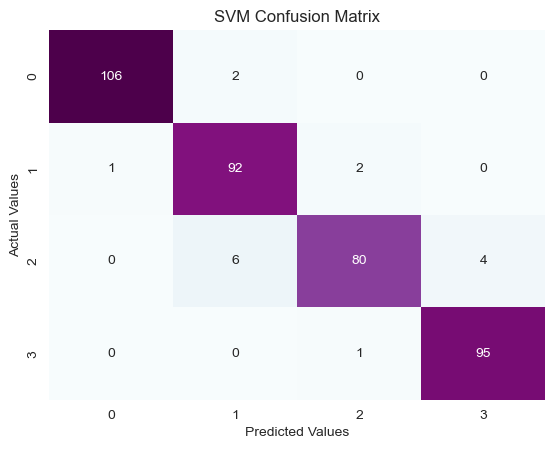

In [75]:
def my_confusion_matrix(y_test, y_pred_svm, plt_title):
    cm=confusion_matrix(y_test, y_pred_svm)
    print(classification_report(y_test, y_pred_svm))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

- We got a very good accuracy on svm model we can just try hyperparameter tuning for increasing the accuracy of svm model


# Hyperparameter Tuning

 - It is the process of selecting the optimal values for a machine learning model's hyperparameters,it can reduce underfiting by finding the best combination of hyperparameters that allow the model to learn fron the data

# SVM Classifier

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm=SVC()

In [88]:
grid1={'C':[0.01,0.1,1,10,100],
     'kernel':['linear','poly','rbf','sigmoid'],
     'gamma':['scale','auto']}

In [91]:
grid_search1=GridSearchCV(estimator=svm,param_grid=grid1,cv=10,scoring='accuracy',n_jobs=1,error_score=0)

In [92]:
grid_search1.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=0, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [109]:
print('Best hyperparameters:', grid_search1.best_params_)


Best hyperparameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


In [95]:
y_pred1=grid_search1.predict(x_test)
y_pred2=grid_search1.predict(x_train)

In [96]:
acc1=accuracy_score(y_test,y_pred1)
acc2=accuracy_score(y_train,y_pred2)

In [141]:
print("Test Accuracy:",acc1)
print("Training Accuracy:",acc2)

Test Accuracy: 0.9717223650385605
Training Accuracy: 0.9845360824742269


In [142]:
r2_score1=r2_score(y_test,y_pred1)

In [143]:
r2_score1

0.9781819479711608

# LOGISTIC REGRESSION

In [99]:
log_reg=LogisticRegression()

In [100]:
grid2={'solver': ['newton-cg','lgfgs','liblinear','sag','saga'],
       'penalty':['l1','l2','elasticnet','none'],
      'C':[0.01,0.1,1,10,100]}

In [106]:
grid_search2 = GridSearchCV(estimator=log_reg, param_grid=grid2, cv=10, scoring='accuracy', n_jobs=-1, error_score=0)


In [107]:
grid_search2.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lgfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [108]:
print('Best hyperparameters:', grid_search2.best_params_)


Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [110]:
y_pred3 = grid_search2.predict(x_test)#Predict x_test
y_pred4 = grid_search2.predict(x_train)#Predict x_train

In [112]:
acc3 = accuracy_score(y_test, y_pred3)#Testing Data
acc4 = accuracy_score(y_train,y_pred4)#Training Data

In [136]:
print("Test Accuracy:",acc3)
print("Training Accuracy:",acc4)

Test Accuracy: 0.974293059125964
Training Accuracy: 0.9806701030927835


In [137]:
r2_score2=r2_score(y_test,y_pred3)

In [138]:
r2_score2

0.9801654072465098

# DECISION TREE CLASSIFIER

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [152]:
grid3 = {'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [5, 7, 10]}


In [153]:
grid_search3 = GridSearchCV(estimator=dtc, param_grid=grid3, cv=10, scoring='accuracy', n_jobs=-1, error_score=0)

In [154]:
grid_search3.fit(x_train, y_train)


GridSearchCV(cv=10, error_score=0, estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [155]:
print('Best hyperparameters:', grid_search3.best_params_)


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [156]:
y_pred5 = grid_search3.predict(x_test)#Predict x_test
y_pred6= grid_search3.predict(x_train)#Predict x_train

In [157]:
acc5 = accuracy_score(y_test, y_pred5)#Testing Data
acc6 = accuracy_score(y_train,y_pred6)#Traning Data

In [158]:

print("Test Accuracy : " , acc5)#Testing Score
print("Traning Accuracy : ", acc6)#Traning Score

Test Accuracy :  0.8380462724935732
Traning Accuracy :  0.9220360824742269


In [159]:
r2_score3=r2_score(y_test,y_pred5)
r2_score3

0.8750420656530119

# COMPARISON REPORT

In [168]:
# Predictions on the test data
y_pred1=grid_search1.predict(x_test)
y_pred3 = grid_search2.predict(x_test)#Predict x_test
y_pred5 = grid_search3.predict(x_test)#Predict x_test

# Calculate R2 score
svm_r2 = r2_score1
Logistic_r2=r2_score2
DT_r2=r2_score3

#Printing the R2 Score

print("Support Vector Machine R2 score:",svm_r2)
print("Logistic Regression R2_score:",Logistic_r2)
print("Decision Tree R2_score:",DT_r2)

results=pd.DataFrame({'Model':['SVC','LogisticRegression','DecisionTreeClassifier'],
                    'Accuracy Score':[acc1, acc3, acc5,]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

models = []
models.append(('SV', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))



Support Vector Machine R2 score: 0.9781819479711608
Logistic Regression R2_score: 0.9801654072465098
Decision Tree R2_score: 0.8750420656530119


In [169]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results_e2 = []
names_e2 = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SV: -0.053466 (0.017017)
LR: -0.429123 (0.039560)
DT: -0.176588 (0.035932)


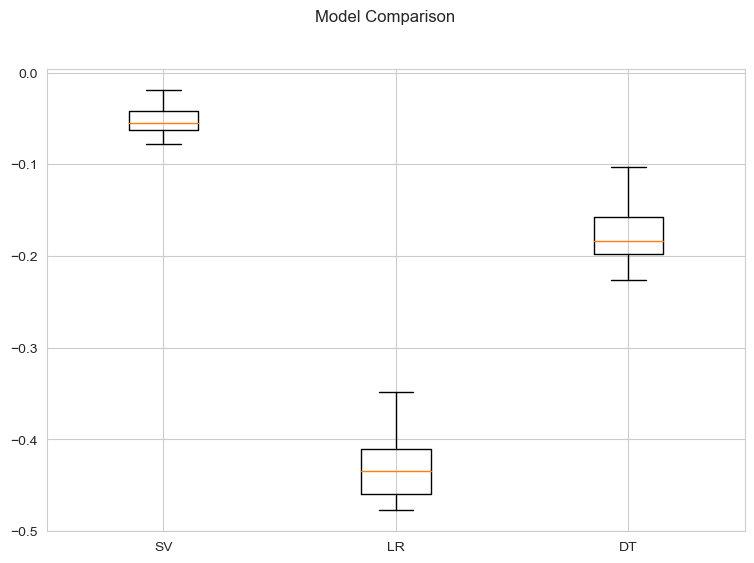

In [170]:
#plot the results

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Model Comparison')
ax.set_xticklabels(names_e2)
plt.show()

# report


- We can see that the Support Vector Machine and the Logistic Regression has the greatest accuracy 

- After increasing the accuracy of the models using hyperparameter tuning we got the best accuracies as possible for our models

- Comparing to our third model Decision Tree , the remaining models have performed well and we can take that model for the next step

- We can see that our SVM Model got 97 % accuracy and our Logistic Regression Model got 98 % accuracy

# Suggessions

 - The phone with highest Ram,Battery power,pixel height ,internal memory at the medium price will get a good sale
 - The features is good and the price is also reasonable so customers will choose it.
 - Looking ahead, product development strategies should focus on enhancing key features while maintaining competitive pricing. Continuous innovation in areas such as performance optimization, battery efficiency, display technology, and storage solutions can drive customer satisfaction and loyalty.

# Conclusion

 - All over project we used so many technique For Example- find relation between various feature ,remove outlier,check missing value,Perform EDA,find best feature using PCA,hyperparameter tuning and train_test_split model evaluation etc..
 - We got good accuracy with two model 1) SVM Classifier 2) Logistics Regression
 - SVM have 97% Accuracy so this is best model for production
 
 
 *) BY USING THESE METHODS WE HAVE SOLVED THE DATA AS PER THEIR REQUIREMENTS


In [ ]:
# INSIGHT